In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
import re
import pickle
import json
import sys
from IPython.display import display, clear_output
import csv
from datetime import datetime
import matplotlib.pyplot as plt

# import zipfile
# import os
# from urllib.request import urlretrieve
# import io
# from urllib.request import urlopen

In [2]:
url = "https://www.worldometers.info/geography/how-many-countries-in-europe/"
response = requests.get(url)

html_content = response.text

soup = BeautifulSoup(html_content, 'html.parser')

In [3]:
# Gets a list of country names for places I would like to analyse

countries = soup.find_all('a', {'class': "text-lime-600"})[3:-4] # Dont want russia, too big, not really a prospect
countries = [country.text for country in countries]
countryData = pd.DataFrame({"Country": countries})
countryData

,Country
0,Germany
1,United Kingdom
2,France
3,Italy
4,Spain
5,Ukraine
6,Poland
7,Romania
8,Netherlands
9,Belgium


In [4]:
# for country in countries:
#     response =  requests.get(f"https://www.numbeo.com/cost-of-living/country_result.jsp?country={country}")

#     html_content = response.text

#     soup = BeautifulSoup(html_content, 'html.parser')

headers = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64; rv:140.0) Gecko/20100101 Firefox/140.0"}

response =  requests.get(f"https://en.wikipedia.org/wiki/List_of_towns_and_cities_with_100,000_or_more_inhabitants/country:_A-B", headers=headers)

html_content = response.text
soup = BeautifulSoup(html_content, 'html.parser')


# countryData.iloc("Germany")["City"] = cities
# countryData


In [5]:
#Gets cities with populations over 100,000 as id like to focus on larger cities

urls = soup.find("div", {"style": "text-align: center;"}).find_all('a', href=True)

urls = [url["href"] for url in urls]

temp = pd.DataFrame({"Country": [], "Province": [],"City": [], "Pop.": []})
#temp["City"] = 

for country in countryData["Country"]:
    cityData = soup.find("h2", {"id": country})
    if cityData is None:
        continue
    cityData = cityData.find_next("tbody").find_all("td")
    cityData = [info.text.split('\n')[0] for info in cityData]
    for index in range(int(len(cityData)/3)):
        temp.loc[temp.shape[0]] = {"Country": country, "Province": cityData[index*3+1], "City": cityData[index*3], "Pop.": cityData[index*3+2]}
temp

,Country,Province,City,Pop.
0,Belgium,Brussels,Anderlecht,"125,883"
1,Belgium,Flanders,Antwerp,"542,417"
2,Belgium,Flanders,Bruges,"119,748"
3,Belgium,Brussels,Brussels,"195,546"
4,Belgium,Wallonia,Charleroi,"203,950"
5,Belgium,Flanders,Ghent,"269,191"
6,Belgium,Wallonia,Liège,"194,994"
7,Belgium,Flemish,Leuven,"103,868"
8,Belgium,Wallonia,Namur,"114,007"
9,Belgium,Brussels,Schaerbeek,"129,853"


In [6]:
for url in urls:
    response =  requests.get(f"https://en.wikipedia.org/{url}", headers=headers)

    html_content = response.text
    soup = BeautifulSoup(html_content, 'html.parser')
    
    for country in countryData["Country"]:
        cityData = soup.find("h2", {"id": country})
        if cityData is None:
            continue
        cityData = cityData.find_next("tbody").find_all("td")
        cityData = [info.text.split('\n')[0] for info in cityData]
        for index in range(int(len(cityData)/3)):
            temp.loc[temp.shape[0]] = {"Country": country, "Province": cityData[index*3+1], "City": cityData[index*3], "Pop.": cityData[index*3+2]}
    time.sleep(3)
cityData = temp

In [7]:
cityData.to_csv("cities.csv", index=False)

In [3]:
response =  requests.get("https://www.iban.com/country-codes", headers=headers)
html_content = response.text
soup = BeautifulSoup(html_content, 'html.parser')


NameError: name 'headers' is not defined

In [9]:
#Gets country abbreviations as for some websites, getting the abbreviations is necessary, as well as clarity 
#and simplicity.

temp = cityData.groupby("Country")
countryabrv = {}
for name, group in temp:
    try:
        countryabrv[name] = soup.find('td', string=name).find_next_sibling('td').text
    except:
        print(name)
countryabrv["Moldova"]= "MD"
countryabrv["Netherlands"]= "NL"

for index in range(len(cityData)):
    cityData.loc[index, "ABBR"] = countryabrv[cityData.loc[index, "Country"]]

cityData

Moldova
Netherlands


,Country,Province,City,Pop.,ABBR
0,Belgium,Brussels,Anderlecht,"125,883",BE
1,Belgium,Flanders,Antwerp,"542,417",BE
2,Belgium,Flanders,Bruges,"119,748",BE
3,Belgium,Brussels,Brussels,"195,546",BE
4,Belgium,Wallonia,Charleroi,"203,950",BE
...,...,...,...,...,...
482,Ukraine,Zakarpattia Oblast,Uzhhorod,"115,442",UA
483,Ukraine,Vinnytsia Oblast,Vinnytsia,"370,601",UA
484,Ukraine,Autonomous Republic of Crimea,Yevpatoria,"105,719",UA
485,Ukraine,Zaporizhzhia Oblast,Zaporizhzhia,"722,713",UA


In [10]:
# for index in range(len(cityData)):
#     response =  requests.get("https://www.batchgeo.com/map/latitude-longitude", headers=headers)
#     html_content = response.text
#     soup = BeautifulSoup(html_content, 'html.parser')

#     print(soup.prettify(), )

#     #quard = soup.find('span', style= "white-space: nowrap; border:1px solid #e85151; padding:4px;").text
#     break

# response = requests.get("https://simplemaps.com/static/data/world-cities/basic/simplemaps_worldcities_basicv1.901.zip", stream=True)
# with open("PLEASE.zip", mode="wb") as file:
#     file.write(response.content)

In [11]:
# os.makedirs("PLEASE", exist_ok=True)

# with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
#     zip_ref.extractall("downloaded_content")



# url = "https://simplemaps.com/static/data/world-cities/basic/simplemaps_worldcities_basicv1.901.zip"

# response = requests.get(url)

# html_content = response.text
# soup = BeautifulSoup(html_content, 'html.parser')
# soup.prettify()


# z = zipfile.ZipFile(io.BytesIO(response.content))
# z.extractall()

# print(f"Extracted files: {z.namelist()}")

# # Step 2: Load the data
# print("\nLoading data...")
# df = pd.read_csv('worldcities.csv')

In [12]:
# https://www.expatistan.com/robots.txt
# https://www.coli.org/
# https://meteostat.net/en/place/cz/prague?s=11520&t=2022-01-01/2022-01-01
# https://open-meteo.com/en/docs/historical-weather-api?hourly=temperature_2m,rain,precipitation,snowfall,snow_depth,cloud_cover&daily=temperature_2m_max,temperature_2m_min,daylight_duration,precipitation_sum&start_date=2021-10-21&location_mode=bounding_box&bounding_box=-90,-180,90,180

In [13]:
# table = soup.find("div", role="rowgroup")
# table
#Gets longitude and latitude in order to get weather data and to possibly map out by location later

# for index in range(len(cityData)):
#     response = requests.get(f"https://latitudelongitude.org/{cityData.loc[index, "ABBR"].lower()}/{cityData.loc[index, "City"].lower()}")
#     html_content = response.text
#     soup = BeautifulSoup(html_content, 'html.parser')

#     test = soup.find('h2')
#     if test.text[:4] == "List":
#         print(soup.find_all('a'))
#         #response = requests.get(test.find_next('a')["href"])
#         html_content = response.text
#         soup = BeautifulSoup(html_content, 'html.parser')

#     #coord = soup.find('span')["text"]
#     break

# soup.prettify()
# print(soup.prettify())
# print(f"{cityData.loc[0, "City"]}, {cityData.loc[0, "Country"]}")


##Figure this out 

# Failed attempt at getting latitude and longitude

[<a href="/"><img src="/images/logo.gif"/></a>, <a name="thetop"></a>, <a href="/">Start</a>, <a href="/be/">Belgium</a>, <a href="/">Home</a>, <a href="/about">About</a>, <a href="/popular">Popular</a>, <a href="#tools">Tools</a>, <a href="https://www.facebook.com/sharer/sharer.php?u=http://latitudelongitude.org/be/anderlecht" target="_blank"><img height="32" src="/images/fb.gif" width="32"/></a>, <a href="http://twitter.com/home?status=http://latitudelongitude.org/be/anderlecht" target="_blank"><img height="32" src="/images/tw.gif" width="32"/></a>, <a href="http://www.linkedin.com/shareArticle?mini=true&amp;url=http://latitudelongitude.org/be/anderlecht&amp;title=Latitude%20Longitude%20/BE/ANDERLECHT" target="_blank"><img height="32" src="/images/in.gif" width="32"/></a>, <a href="https://plus.google.com/share?url=http://latitudelongitude.org/be/anderlecht" target="_blank"><img height="32" src="/images/g1.gif" width="32"/></a>, <a href="#thetop">⇑TOP⇑</a>, <a name="tools"></a>, <a h

In [69]:
# For the url search to work I need all accents umlauts etc to be standardized into english alphabet
normalizer = {
    'ő': 'o',
    'è': 'e',
    'î': 'i',
    'ç': 'c',
    'ä': 'a',
    'ü': 'u',
    'é': 'e',
    'á': 'a',
    'ñ': 'n',
    'ă': 'a',
    'ę': 'e',
    'ą': 'a',
    'ł': 'l',
    'ź': 'z',
    'š': 's',
    'ę': 'e',
    'ó': 'o',
    'ö': 'o',
    'í': 'i',
    'ś': 's',
    'ń': 'n',
    'â': 'a',
    'å': 'a',
    'ë': 'e',
    'ș': 's',
    'ì': 'i',
}

In [66]:
# Gets living data like price and cost of living

count = 0
cityData["Total COL"] = 0
cityData["Rent"] = 0
cityData["Sal"] = 0
cityData["QOL"] = 0


for index in range(len(cityData)):
    cityNorm = '-'.join(cityData.loc[index, "City"].lower().split(" "))
    for index2 in range(len(cityNorm)):
        if normalizer.get(cityNorm[index2]) != None:
            cityNorm = cityNorm[:index2] + normalizer.get(cityNorm[index2]) + cityNorm[index2+1:]
    try:
        response = requests.get(f"https://livingcost.org/cost/{cityData.loc[index, "Country"].lower()}/{cityNorm}/", headers=headers)
        response.raise_for_status()
    except:
        # print(response.content)
        count += 1
        print(f"https://livingcost.org/cost/{cityData.loc[index, "Country"].lower()}/{cityNorm}/")
        time.sleep(2)
        continue


    time.sleep(2)

    
    html_content = response.text
    soup = BeautifulSoup(html_content, 'html.parser')

    table = soup.find('table').find_all('span')
    
    cityData.loc[index, "Total COL"] = int(table[1].text[1:])
    try:
        cityData.loc[index, "Rent"] = int(table[11].text[1:])
    except:
        cityData.loc[index, "Rent"] = int(float(table[11].text[1:]))
    cityData.loc[index, "Sal"] = int(table[26].text[1:])

    
    cityData.loc[index, "QOL"] = int(soup.find('td', headers="quality").text.replace(' ', '').replace("'", ''))

count
cityData

https://livingcost.org/cost/belarus/lida/
https://livingcost.org/cost/belarus/mazyr/
https://livingcost.org/cost/belarus/orsha/
https://livingcost.org/cost/france/aix-en-provence/
https://livingcost.org/cost/france/amiens/
https://livingcost.org/cost/france/angers/
https://livingcost.org/cost/france/annecy/
https://livingcost.org/cost/france/argenteuil/
https://livingcost.org/cost/france/besancon/
https://livingcost.org/cost/france/bordeaux/
https://livingcost.org/cost/france/boulogne-billancourt/
https://livingcost.org/cost/france/brest/
https://livingcost.org/cost/france/caen/
https://livingcost.org/cost/france/clermont-ferrand/
https://livingcost.org/cost/france/dijon/
https://livingcost.org/cost/france/grenoble/
https://livingcost.org/cost/france/le-havre/
https://livingcost.org/cost/france/lille/
https://livingcost.org/cost/france/limoges/
https://livingcost.org/cost/france/lyon/
https://livingcost.org/cost/france/le-mans/
https://livingcost.org/cost/france/marseille/
https://livi

,Country,Province,City,Pop.,ABBR,Rent,Total COL,Sal,QOL
0,Belgium,Brussels,Anderlecht,"125,883",BE,1033,1889,3040,76
1,Belgium,Flanders,Antwerp,"542,417",BE,909,1818,2918,91
2,Belgium,Flanders,Bruges,"119,748",BE,1005,1868,2486,82
3,Belgium,Brussels,Brussels,"195,546",BE,1133,2028,3458,91
4,Belgium,Wallonia,Charleroi,"203,950",BE,928,1718,2345,87
...,...,...,...,...,...,...,...,...,...
482,Ukraine,Zakarpattia Oblast,Uzhhorod,"115,442",UA,249,494,471,41
483,Ukraine,Vinnytsia Oblast,Vinnytsia,"370,601",UA,275,603,423,43
484,Ukraine,Autonomous Republic of Crimea,Yevpatoria,"105,719",UA,0,0,0,0
485,Ukraine,Zaporizhzhia Oblast,Zaporizhzhia,"722,713",UA,0,0,0,0


In [5]:
cityData = pd.read_csv("cities.csv")

response = requests.get(f"https://en.wikipedia.org/wiki/Regions_of_France", headers=headers)
html_content = response.text
soup = BeautifulSoup(html_content, 'html.parser')

    

In [86]:
# Some cities need province abbreviation to be searched so we add that for the cities that need them

cityData["Prov. ABBR"] = ""

needed = soup.find('h2', string="List of administrative regions")

needed = needed.find_next('tbody')


for index, row in cityData[cityData["Country"] == "France"].iterrows():
    temp = needed.find('a', title=re.compile(row["Province"]))
    if temp == None:
        print(row["Province"])
        continue
    cityData.loc[index, "Prov. ABBR"] = temp.find_parent('tr').find_all('td')[3].text.split('-')[1].split("\n")[0]

cityData.to_csv("cities.csv", index=False)

In [28]:
cityData = pd.read_csv("cities.csv")

response = requests.get(f"https://en.wikipedia.org/wiki/Regions_of_Germany", headers=headers)
html_content = response.text
soup = BeautifulSoup(html_content, 'html.parser')


In [29]:
needed = soup.find('h3', id="List")

needed = needed.find_next('tbody')


for index, row in cityData[cityData["Country"] == "Germany"].iterrows():
    temp = needed.find('a', title=re.compile(row["Province"]))
    if temp == None:
        print(row["Province"])
        continue

    cityData.loc[index, "Prov. ABBR"] = temp.find_parent('tr').find_all('td')[1].text.replace(' ', '').split("\n")[0]

In [30]:
cityData.to_csv("cities.csv", index=False)

In [40]:
cityData = pd.read_csv("cities.csv")

response = requests.get(f"https://en.wikipedia.org/wiki/Provinces_of_Italy", headers=headers)
html_content = response.text
soup = BeautifulSoup(html_content, 'html.parser')

In [55]:
needed = soup.find('h3', id="List")

needed = needed.find_next('tbody')


for index, row in cityData[cityData["Country"] == "Italy"].iterrows():
    cityData.loc[index, "Prov. ABBR"] = row['Province'][0:2].upper()
    # temp = needed.find('a', title=re.compile(row["City"]))
    # if temp == None:
    #     print(row["Province"])
    #     continue
    # print(temp.find_parent('tr').find_all('td')[3].text)
    # break

    # cityData.loc[index, "Prov. ABBR"] = temp.previous_sibling().text.replace(' ', '').split("\n")[0]

In [83]:
# Not all province abbreviation was perfect as its not standardized accross everywhere
# so I manually fix the ones that needed to be fixed

for index, row in cityData[cityData["Country"] == "Italy"].iterrows():
    if cityData.loc[index, "Prov. ABBR"] == 'EM':
        cityData.loc[index, "Prov. ABBR"] = 'ER'
    if cityData.loc[index, "Province"] == 'Trentino-Alto Adige/Südtirol':
        cityData.loc[index, "Prov. ABBR"] = 'TT'
    if cityData.loc[index, "Province"] == 'Lazio':
        cityData.loc[index, "Prov. ABBR"] = 'LZ'
    if cityData.loc[index, "Province"] == 'Friuli-Venezia Giulia':
        cityData.loc[index, "Prov. ABBR"] = 'FG'
    if cityData.loc[index, "Province"] == 'Campania':
        cityData.loc[index, "Prov. ABBR"] = 'CM'

In [84]:
print(cityData[cityData["Country"] == "Italy"])

    Country                      Province                   City       Pop.  \
177   Italy                        Apulia                   Bari    316,736   
178   Italy                      Lombardy                Bergamo    119,809   
179   Italy                Emilia-Romagna                Bologna    389,200   
180   Italy  Trentino-Alto Adige/Südtirol                Bolzano    106,410   
181   Italy                      Lombardy                Brescia    197,236   
182   Italy                      Sardinia               Cagliari    148,296   
183   Italy                        Sicily                Catania    299,730   
184   Italy                Emilia-Romagna                Ferrara    129,724   
185   Italy                       Tuscany               Florence    362,742   
186   Italy                        Apulia                 Foggia    146,017   
187   Italy                Emilia-Romagna                  Forlì    116,726   
188   Italy                       Liguria           

In [85]:
for index, row in cityData[(cityData["Country"] == "Germany") & (cityData["Prov. ABBR"].notnull())].iterrows():
    if row["City"] == "Berlin":
        cityData.loc[index, "Prov. ABBR"] = "BB"
    if row["Province"] == "Saxony":
        cityData.loc[index, "Prov. ABBR"] = "SN"

In [86]:
cityData.to_csv("cities.csv", index=False)

In [3]:
cityData = pd.read_csv("cities.csv")

In [87]:
# Input missing data 

for index, row in cityData[(cityData["Rent"] == 0) & (cityData['Prov. ABBR'].notnull())].iterrows():
    cityNorm = '-'.join(cityData.loc[index, "City"].lower().split(" "))
    for index2 in range(len(cityNorm)):
        if normalizer.get(cityNorm[index2]) != None:
            cityNorm = cityNorm[:index2] + normalizer.get(cityNorm[index2]) + cityNorm[index2+1:]
    try:
        response = requests.get(f"https://livingcost.org/cost/{cityData.loc[index, "Country"].lower()}/{cityData.loc[index, "Prov. ABBR"].lower()}/{cityNorm}/", headers=headers)
        response.raise_for_status()
    except:
        # print(response.content)
        print(f"https://livingcost.org/cost/{cityData.loc[index, "Country"].lower()}/{cityData.loc[index, "Prov. ABBR"].lower()}/{cityNorm}/")
        time.sleep(2)
        continue


    time.sleep(2)

    
    html_content = response.text
    soup = BeautifulSoup(html_content, 'html.parser')

    table = soup.find('table').find_all('span')
    
    cityData.loc[index, "Total COL"] = int(table[1].text[1:])
    try:
        cityData.loc[index, "Rent"] = int(table[11].text[1:])
    except:
        cityData.loc[index, "Rent"] = int(float(table[11].text[1:]))
    cityData.loc[index, "Sal"] = int(table[26].text[1:])

    
    cityData.loc[index, "QOL"] = int(soup.find('td', headers="quality").text.replace(' ', '').replace("'", ''))


In [96]:
cityData = cityData[cityData['Rent'] != 0]

In [95]:
cityData.to_csv("cities.csv", index=False)

In [97]:
cityData.shape[0]

439

In [118]:
cityData["Lat"] = 0.0
cityData["Long"] = 0.0

In [120]:
# Gets long and lat by city

for index, row in cityData.iterrows():
    params = {
        'q': f"{row["City"]}, {row["Country"]}",
        'format': 'json',
        'limit': 1
    }
    
    response = requests.get('https://nominatim.openstreetmap.org/search', params=params, headers={'User-Agent': 'WeatherDataScript/1.0'})
    # Max of one request per second, must use a valid user agent
    # Credit to OpenStreetMap
    
    
    if response.status_code == 200:
        data = response.json()
        if data:
            result = data[0]
            cityData.loc[index, "Lat"] = float(result['lat'])
            cityData.loc[index, "Long"] = float(result['lon'])
    else:
        print(response)
    time.sleep(3)
    cityData.to_csv("citiesLoc.csv", index=False)

In [117]:
cityData.head()

,Country,Province,City,Pop.,ABBR,Rent,Total COL,Sal,QOL,Prov. ABBR,Lat,Long
0,Belgium,Brussels,Anderlecht,"125,883",BE,1033,1889,3040,76,NaN,0.0,0.0
1,Belgium,Flanders,Antwerp,"542,417",BE,909,1818,2918,91,NaN,0.0,0.0
2,Belgium,Flanders,Bruges,"119,748",BE,1005,1868,2486,82,NaN,0.0,0.0
3,Belgium,Brussels,Brussels,"195,546",BE,1133,2028,3458,91,NaN,0.0,0.0
4,Belgium,Wallonia,Charleroi,"203,950",BE,928,1718,2345,87,NaN,0.0,0.0


In [113]:
cityData.to_csv("citiesLoc.csv", index=False)

In [ ]:
cities.shape

In [121]:
print('h')

h


In [217]:
#DO NOT RUN THIS

# Creates needed variables like the dictionary. If this is run then all data is erased and needs to be rescraped

# cityTemps = pd.read_csv("citiesLoc.csv")

# weatherDict = {}
# lastInput = {"lastIndex": 0}
# with open("lastInput.json", "w") as f:
#     json.dump(lastInput, f)

In [2]:
cityTemps = pd.read_csv("citiesLoc.csv")

In [3]:
batchSize = 100 #Size of the batch requested from the site. You get penelized less for larger batches but you 
# can typically only get one batch a day due to constraints

In [4]:
with open('lastInput.json', 'r') as file:
    lastIndex = json.load(file)['lastIndex']
lastIndex

#Finds the last index input as to not rescrape or rewrite data

438


201 on
44.8476352, 9.6665313
43.9357181, 11.0941473
44.3640607, 12.0590095
38.1035389, 15.6397556
44.6086674, 10.5940667
43.9465433, 12.630749
41.8933203, 12.4829321
40.4194417, 15.3106085
40.7234746, 8.5612674
37.0646139, 15.2907196
40.5488156, 17.0805801
42.6539486, 12.4396528
46.1029536, 11.1297425
45.6496485, 13.7772781
45.0677551, 7.6824892
45.4371908, 12.3345898
45.4424977, 10.9857377
45.6348591, 11.4063543
37.9755648, 23.7348324
38.246242, 21.7350847
35.33908, 25.1332843
39.6383092, 22.4160706
37.9431594, 23.6470593
39.3624833, 22.9401864
38.0128111, 23.6955137
40.6403167, 22.9352716
47.4813896, 19.1460941
47.531399, 21.6259782
47.6835029, 17.6342832
46.9073883, 19.6917206
48.1030643, 20.7900429
47.9557802, 21.7167982
46.0765092, 18.2280317
46.2546312, 20.1486016
53.3493795, -6.2605593
51.8985136, -8.4726423
64.145981, -21.9422367
52.4417513, 5.2092943
52.3730796, 4.8924534
52.1795738, 5.9300775
52.0056642, 5.8762345
51.5887845, 4.7760237
51.9994572, 4.3627245
52.2694896, 6.2364886
52.0716825, 5.7455106
51.4392648, 5.478633
52.7528662, 6.9525135
52.2233632, 6.8705957
53.2190652, 6.5680077
52.3837058, 4.6435597
52.0799838, 4.3113461
53.2005936, 5.7918548
52.1518157, 4.4811089
50.8512438, 5.6909768
51.8425749, 5.8389606
51.9244424, 4.47775
51.5856184, 5.0660616
52.0907006, 5.1215634
51.3924489, 6.1511724
52.5089759, 6.0943765
59.9133301, 10.7389701
60.3943055, 5.3259192
63.4304475, 10.3952118
58.9699675, 5.7318101
59.1862013, 10.8680241
58.0856276, 7.931858
59.6964936, 10.175642
46.8566229, 29.6059359
54.6870458, 25.2829111
54.8982139, 23.9044817
55.9340823, 23.3157775
56.9493977, 24.1051846
49.8158683, 6.1296751
42.4415238, 19.2621081
38.9950921, -1.8559154
40.481954, -3.363981
40.5400082, -3.6358494
36.1311725, -5.4473991
38.3436365, -0.4881708
36.8414197, -2.4628135
38.878187, -6.9701115
41.4493539, 2.248254
41.3825802, 2.177073
43.2630018, -2.9350039
42.343926, -3.696977
36.5297438, -6.2928976
37.6152488, -0.9876857
39.9860347, -0.0377354
37.8845813, -4.7760138
43.3709703, -8.3959425
37.283689, -5.9226718
38.2653307, -0.6988391
40.282476, -3.7923422
43.5449422, -5.66275
41.9793006, 2.8199439
37.1734995, -3.5995337
37.2575874, -6.9484945
37.9553976, -3.4937431
36.6816936, -6.1377402
42.5989995, -5.5682413
41.6147605, 0.6267842
42.4661196, -2.4396676
40.416782, -3.703507
36.7213028, -4.4216366
36.508976, -4.88562
41.5398348, 2.4448926
40.3238525, -3.8649214
37.9923795, -1.1305431
42.1939629, -7.537124
43.3618625, -5.8483581
39.5695818, 2.6500745
27.9580004, -15.6062305
42.8181992, -1.6440089
41.5421013, 2.1138977
40.9651572, -5.6640182
28.4857715, -16.3159422
43.3224219, -1.9838889
28.467178, -16.2507843
43.4618932, -3.8100255
37.3886303, -5.9953403
41.1172364, 1.2546057
41.5629623, 2.0100492
40.4587767, -3.4793343
39.4697065, -0.3763353
41.6521807, -4.728605
42.2376602, -8.7247205
42.8465088, -2.6724025
41.6521342, -0.8809428
53.1275051, 23.1470509
49.8120785, 19.0291988
53.1297127, 18.0294488
50.3470387, 18.9231857
50.2884726, 18.9703798
50.8120466, 19.113213
50.369624, 19.2890465
54.1988997, 19.4410857
54.4288032, 18.798327
54.5233304, 18.6040279
50.294113, 18.6657306
52.7309926, 15.2400451
50.2598987, 19.0215852
50.8540285, 20.6099157
54.2071799, 16.2175411
50.0619474, 19.9368564
51.7728245, 19.4784857
51.2181945, 22.5546776
53.776644, 20.4777531
50.6787929, 17.9298844
52.5464521, 19.7008606
52.4006632, 16.9197326
51.4171606, 21.1609448
50.2858001, 18.8747933
50.1105691, 18.5531874
50.013319, 22.0161677
50.2712401, 19.2155628
53.4298114, 14.5928676
50.0259883, 20.9640584
53.0145361, 18.5965831
50.1264981, 19.0067846
50.7659054, 16.2825424
52.2319581, 21.0067249
52.6655636, 19.0961297
51.1263106, 16.9781963
50.3142806, 18.7815763
51.9383777, 15.5050408
46.1753793, 21.3196342
46.4228703, 26.7163991
47.6565584, 23.5719843
45.2716092, 27.9742932
44.4361414, 26.1027202
45.2692582, 26.7748173
46.769379, 23.5899542
44.3190159, 23.7965614
47.0549163, 21.9285231
45.7973912, 24.1519202
57.7072326, 11.9670171
56.0442098, 12.703706
57.7825634, 14.165719
58.4098135, 15.6245252
55.6052931, 13.0001566
59.2747287, 15.2151181
59.3251172, 18.0710935
59.8586126, 17.6387436
59.6110992, 16.5463679
60.6750132, 17.1467019
38.758959, -9.2365233
41.5510583, -8.4280045
38.6968919, -9.4204495
40.2111931, -8.4294632
32.6496497, -16.9086783
38.7077507, -9.1365919
38.8308741, -9.1684512
41.1502195, -8.6103497
38.8355446, -9.3522371
41.1292264, -8.6057396
47.5581077, 7.5878261
46.9484742, 7.4521749
46.2017559, 6.1466014
46.5218269, 6.6327025
47.4991723, 8.7291498
47.3744489, 8.5410422
44.0131786, 20.9196353
43.3211301, 21.8959232
45.2551338, 19.8451756
46.1002058, 19.6653273
48.1516988, 17.1093063
48.7172272, 21.2496774
46.0500268, 14.5069289
49.7969703, 30.1158069
49.1460165, 31.2271744
51.272593, 31.7417235
48.3810791, 26.1081673
49.6243131, 31.6666824
48.0158753, 37.8013407
48.3058686, 38.0027664
48.7481718, 24.5207477
48.5167748, 34.6068797
49.9923181, 36.2310146
46.5421715, 33.4079326
49.268624, 27.0635998
48.7389415, 37.5843812
49.0928529, 33.4308188
48.5105805, 32.2656283
47.9102734, 33.3917703
49.2724587, 38.9150477
50.7450733, 25.320078
49.841952, 24.0315921
48.0448144, 37.9635093
47.0957648, 37.5499621
46.8467267, 35.3827281
47.3886032, 31.9442334
49.8607809, 33.7498787
51.2074112, 26.5208033
48.9478698, 38.4936475
50.9119775, 34.8027723
49.6630002, 25.6167516
48.6223731, 22.3022572
48.8990315, 28.516068
50.9080532, 28.3867504

remaining city data needed

In [5]:
# https://open-meteo.com/en/terms open meteo terms
with open("weatherDict.pkl", 'rb') as f:
    weatherDict = pickle.load(f)

with open('lastInput.json', 'r') as file:
    lastIndex = json.load(file)['lastIndex'] + 1

for i in range(lastIndex, len(cityTemps), batchSize):
    #Getting 8 requests is most efficient in terms of api calls, though because of the daily limit, getting all the data will likely take days
    lats = cityTemps.iloc[i : i + batchSize]["Lat"].tolist()
    longs = cityTemps.iloc[i : i + batchSize]["Long"].tolist()

    if i+batchSize > len(cityTemps):
        lats = cityTemps.iloc[i:]["Lat"].tolist()
        longs = cityTemps.iloc[i:]["Long"].tolist()
    else:
        lats = cityTemps.iloc[i : i + batchSize]["Lat"].tolist()
        longs = cityTemps.iloc[i : i + batchSize]["Long"].tolist()
    
    params = {
        'latitude': lats,
        'longitude': longs,
        "start_date": "2022-11-07",
    	"end_date": "2025-11-06",
        "daily": ["weather_code", "temperature_2m_mean", "temperature_2m_max", "temperature_2m_min", "wind_speed_10m_max", "rain_sum", "snowfall_sum", "precipitation_hours", "daylight_duration"],
        'timezone': 'auto'
    }
    
    responses = requests.get("https://archive-api.open-meteo.com/v1/archive", params=params)
    
    while responses.status_code == 429:
        print("Waiting 2 minutes\nIndex: ", i)
        time.sleep(120)
        responses = requests.get("https://archive-api.open-meteo.com/v1/archive", params=params)
        while responses.status_code == 429:home
            clear_output(wait=True)
            print("Waiting 20 minutes\nIndex: ", i)
            time.sleep(600)
            print("10 Minutes elapsed")
            time.sleep(600)
            responses = requests.get("https://archive-api.open-meteo.com/v1/archive", params=params)
            clear_output(wait=True)
            count = 1
            ##if
            while responses.status_code == 429:
                print("Waiting an Hour and 10 Minutes\nIndex: ", i)
                time.sleep(1200)
                print("20 Minutes elapsed")
                time.sleep(1200)
                print("20 Minutes elapsed")
                time.sleep(1200)
                print("20 Minutes elapsed")
                time.sleep(600)
                print("Attempting to Continue")
                responses = requests.get("https://archive-api.open-meteo.com/v1/archive", params=params)
                clear_output(wait=True)
                print(f"Attempt: {count} of an hour and ten minutes. Batchsize: {batchSize}")
                if responses.status_code == 429:
                    print("Daily rate limit most likely exceeded.\nEnding program")
                    sys.exit()

        print("Resumed")
        
    
    if responses.status_code == 200:
        

            data = responses.json()
            print()
            for index in range(len(data)):
                # print(cityTemps.loc[index + i, "City"], " Index: ", index + i, " Coords: ", data[index]["latitude"], " " , data[index]["longitude"])
                weatherDict[(cityTemps.loc[index + i, "City"], cityTemps.loc[index + i, "ABBR"])] = pd.DataFrame(data[index]['daily'])
                # print(place["latitude"], " " , place["longitude"])
                # df = pd.DataFrame(response)
                lastInput = {"lastIndex": i+index}
                with open("lastInput.json", "w") as f:
                    json.dump(lastInput, f)
            clear_output(wait=True)
            print(f"--> Batch {i/batchSize} of {cityTemps.shape[0]/batchSize} is input.")
                
    else:
        print(responses.status_code, " ", i)
        
    with open('weatherDict.pkl', 'wb') as f:
        pickle.dump(weatherDict, f)
    time.sleep(60)

--> Batch 3.5 of 4.39 is input.


In [7]:
len(weatherDict)
# len(weatherDict.keys())
# weatherDict[("Neuss", "DE")]
# weatherDict[("Münster", "DE")]

439

In [4]:
with open("weatherDict.pkl", 'rb') as f:
    weatherDict = pickle.load(f)# cityTemps.iloc[0 : 0 + 8]["Lat"].tolist()
# temp

In [5]:
# Makes weathercode easier to understand

weatherCode = {
    0: "Clear Sky",
    1: "Mainly Clear",
    2: "Partly cloudy",
    3: "Overcast",
    45: "Fog" ,
    48: "Fog With Light Freezing",
    51: "Light Drizzle",
    52: "Moderate Drizzle",
    53: "Dense Drizzle",
    61: "Light Rain",
    62: "Moderate Rain",
    63: "Heavy Rain",
    95: "Slight Thunderstorm",
    96: "Moderate Thunderstorm",
    99: "Thunderstorm w/ Hail",
}

In [6]:
# cityTemps.iloc[149]

# The weather data is extremely comprehensive, I may still use more later but for now I input weather facts i would like to know
# into the data frame, and average out the weather to be per season rather than by day by year.

cityAdd = pd.DataFrame(cityTemps)
cityAdd["Snow Days/Y"] = 0.0
cityAdd["Snow Fall/Y"] = 0.0
cityAdd["Total Temps Ave"] = 0.0
cityAdd["Summer Temps Ave"] = 0.0
cityAdd["Spring Temps Ave"] = 0.0
cityAdd["Winter Temps Ave"] = 0.0
cityAdd["Fall Temps Ave"] = 0.0

cityAdd["Highest 3 Year"] = 0.0
cityAdd["Lowest 3 Year"] = 0.0

cityAdd["Most Days"] = ""

cityAdd["Sunny Days/Y"] = 0.0

cityAdd["Hours Rained/Y"] = 0.0

cityAdd["Winter Daylight"] = 0.0

for index, row in cityAdd[:len(weatherDict)].iterrows():
    weath = weatherDict.get((row["City"], row["ABBR"]))
    snowdays = weath[weath['snowfall_sum']>0]
    cityAdd.loc[index, "Snow Days/Y"] = snowdays.shape[0]/3
    cityAdd.loc[index, "Snow Fall/Y"] = snowdays["snowfall_sum"].sum()/3

    cityAdd.loc[index, "Total Temps Ave"] = weath["temperature_2m_mean"].mean()

    weath["time"] = pd.to_datetime(weath["time"])
    # , errors='coerce'
    
    target = "9-1"
    start = datetime.strptime(target, "%m-%d")
    target = "12-1"
    end = datetime.strptime(target, "%m-%d")
    
    fall = weath[(weath["time"].dt.month >= start.month) & (weath["time"].dt.month < end.month)]
    
    target = "12-1"
    start = datetime.strptime(target, "%m-%d")
    target = "3-1"
    end = datetime.strptime(target, "%m-%d")
    
    winter = weath[(weath["time"].dt.month == start.month) | (weath["time"].dt.month < end.month)]
    
    target = "3-1"
    start = datetime.strptime(target, "%m-%d")
    target = "6-1"
    end = datetime.strptime(target, "%m-%d")
    
    spring = weath[(weath["time"].dt.month >= start.month) & (weath["time"].dt.month < end.month)]
    
    target = "6-1"
    start = datetime.strptime(target, "%m-%d")
    target = "9-1"
    end = datetime.strptime(target, "%m-%d")
    
    summer = weath[(weath["time"].dt.month >= start.month) & (weath["time"].dt.month < end.month)]

    cityAdd.loc[index, "Summer Temps Ave"] = summer["temperature_2m_mean"].mean()
    cityAdd.loc[index, "Spring Temps Ave"] = spring["temperature_2m_mean"].mean()
    cityAdd.loc[index, "Winter Temps Ave"] = winter["temperature_2m_mean"].mean()
    cityAdd.loc[index, "Fall Temps Ave"] = fall["temperature_2m_mean"].mean()

    cityAdd.loc[index, "Highest 3 Year"] = winter["temperature_2m_max"].max()
    cityAdd.loc[index, "Lowest 3 Year"] = fall["temperature_2m_min"].min()   

    # weath.loc[weath["weather_code"] == 2, ['weather_code']] +=1 

    # print(weath["weather_code"].value_counts())

    cityAdd.loc[index, "Most Days"] = weatherCode[weath["weather_code"].mode()[0]] 

    cityAdd.loc[index, "Sunny Days/Y"] = len(weath[weath["weather_code"] == 0])/3

    cityAdd.loc[index, "Hours Rained/Y"] = weath["precipitation_hours"].sum()/3

    cityAdd.loc[index, "Winter Daylight"] = (winter["daylight_duration"].mean()/60)/60

cityAdd

NameError: name 'cityTemps' is not defined

In [10]:
# weath["weather_code"] = pd.to_numeric(weath["weather_code"])

# weath.loc[weath["weather_code"] == 2, ['weather_code']] +=1 
# # weath["weather_code"].mode()[0]
# weath["weather_code"].value_counts()
# len(weath[weath["weather_code"] == 0])
# len(weath)
# len(weatherDict.get(("Anderlecht", "BE")))
# weatherDict.get(("Anderlecht", "BE"))
cityAdd[0:len(weatherDict)].to_csv("citiesWWeather.csv", index=False)
# cityAdd[cityAdd["QOL"] == cityAdd["QOL"].min()]

,Country,Province,City,Pop.,ABBR,Rent,Total COL,Sal,QOL,Prov. ABBR,...,Summer Temps Ave,Spring Temps Ave,Winter Temps Ave,Fall Temps Ave,Highest 3 Year,Lowest 3 Year,Most Days,Sunny Days/Y,Hours Rained/Y,Winter Daylight
429,Ukraine,Zaporizhzhia Oblast,Melitopol,"150,768",UA,265,545,428,39,NaN,...,24.698913,12.087681,1.864576,13.137363,15.4,-2.9,Overcast,25.000000,886.0,9.283219
433,Ukraine,Luhansk Oblast,Sievierodonetsk,"101,135",UA,331,633,425,39,NaN,...,23.075725,11.322101,-1.076753,11.261905,13.3,-11.6,Overcast,18.666667,1069.0,9.054728


In [7]:
cityAdd = pd.read_csv("citiesWWeather.csv")

In [11]:
# cityAdd[cityAdd["Summer Temps Ave"] == cityAdd["Summer Temps Ave"].max()]
# I got so much data and wanted to analyze it, might do something with this, im unsure
# Ben score is a very roughly weighted approximation of factors I would like or dislike combined into a single
# score

cityAdd["Ben Score"] = 0

avSpending = abs(cityAdd["Sal"].mean()-cityAdd["Total COL"].mean())

for index, row in cityAdd.iterrows():
    score = int(
        row["QOL"]*150
        -max(row["Snow Days/Y"] - 30, 30 - row["Snow Days/Y"])*120
        -((abs(row["Sal"]-row["Total COL"])-avSpending)/avSpending)*1500
        -(row["Rent"]/row["Sal"])*1000
        +row["Sunny Days/Y"]*50
        - (cityAdd["Winter Daylight"].max() - row["Winter Daylight"])*50
        -row["Hours Rained/Y"]/3
        # -abs(max(0, row["Summer Temps Ave"]-30)) * 3 #maybe add column for hot days
    )
    cityAdd.loc[index, "Ben Score"] = score

cityAdd.iloc[0:len(weatherDict)].sort_values("Ben Score", ascending = False).head(10)
# cityAdd.iloc[0:len(weatherDict)].sort_values("Ben Score", ascending = False).tail(10)
# cityAdd["Winter Daylight"].max()
# cityAdd.iloc[0:len(weatherDict)].sort_values("Ben Score", ascending = False).to_csv("fun.csv", index=False)

,Country,Province,City,Pop.,ABBR,Rent,Total COL,Sal,QOL,Prov. ABBR,...,Spring Temps Ave,Winter Temps Ave,Fall Temps Ave,Highest 3 Year,Lowest 3 Year,Most Days,Sunny Days/Y,Hours Rained/Y,Winter Daylight,Ben Score
98,Germany,Berlin,Berlin,"3,520,000",DE,1217,2222,3412,96,BB,...,10.555072,3.000000,11.446520,16.5,-7.9,Overcast,10.666667,1422.333333,8.609688,13189
125,Germany,Lower Saxony,Hanover,"532,200",DE,891,1828,2914,93,NI,...,10.401812,3.875646,11.710989,17.2,-4.7,Overcast,9.666667,1714.000000,8.628823,12675
137,Germany,Saxony,Leipzig,"560,500",DE,856,1690,3010,92,SN,...,10.472826,3.400369,11.729670,17.3,-5.5,Overcast,12.000000,1463.333333,8.767729,12523
31,Bulgaria,Sofia City,Sofia,"1,280,334",BG,629,1244,1061,78,NaN,...,10.910145,2.726937,12.623077,19.6,-5.6,Overcast,28.333333,1007.666667,9.677714,12499
220,Greece,Crete,Heraklion,"145,440",GR,613,1256,1108,74,NaN,...,17.434783,13.400000,21.090842,24.7,8.7,Overcast,86.666667,767.000000,10.253025,12428
302,Spain,Community of Madrid,Madrid,"3,332,035",ES,1177,2015,2580,92,NaN,...,14.044928,6.730627,15.889011,20.6,0.5,Overcast,38.333333,847.333333,9.874059,12396
362,Poland,Lower Silesian,Wrocław,"674,132",PL,977,1592,1688,79,NaN,...,10.432246,2.677860,11.064469,15.7,-6.4,Overcast,10.666667,1447.666667,8.794580,12348
123,Germany,Hamburg,Hamburg,"1,747,400",DE,1127,2172,3668,95,HH,...,10.021377,3.521771,11.202930,15.6,-4.8,Overcast,7.000000,1798.000000,8.471364,12330
119,Germany,North Rhine-Westphalia,Gelsenkirchen,"260,400",DE,726,1506,2335,91,NW,...,10.959058,4.666421,12.374725,16.6,-3.8,Overcast,9.333333,2033.000000,8.749660,12285
128,Germany,North Rhine-Westphalia,Herne,"155,900",DE,844,1631,2191,89,NW,...,10.825725,4.499631,12.176557,16.5,-4.8,Overcast,8.333333,2022.000000,8.740577,12278


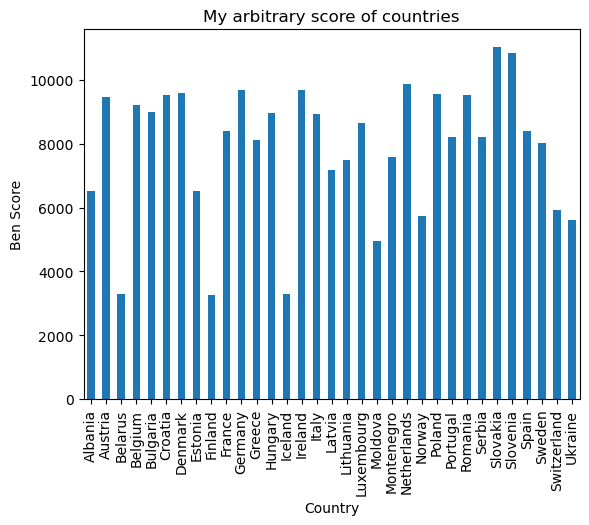

In [23]:
# cityAdd = pd.read_csv("fun.csv")
# for data in responses:
#     daily_data = data.Daily()
#     print(data["latitude"], " " , data["longitude"])
#                 # df = pd.DataFrame(response)
# print(weatherDict.get(("Nuremburg", "DE")))
# type(responses)
# data = responses.json()
# type(data)
# data[0]['daily']
# cityAdd[cityAdd["Sunny Days/Y"]==cityAdd["Sunny Days/Y"].max()]
countryBen = cityAdd.groupby("Country")["Ben Score"].mean()
countryBen.plot(kind='bar')

plt.xlabel('Country')
plt.ylabel('Ben Score')
plt.title('My arbitrary score of countries')
plt.show()

In [ ]:
weatherToColor = {
    0: 0,
    1: 1,
    2: 2,
    3: 3,
    45: 4 ,
    48: 5,
    51: 6,
    52: 7,
    53: 8,
    61: 9,
    62: 10,
    63: 11,
    95: 12,
    96: 13,
    99: 14,
}

In [ ]:
target = "8-2-2022"
start = datetime.strptime(target, "%m-%d-%Y")
# target = "6-1"
# end = datetime.strptime(target, "%m-%d")

fig, axes = plt.subplots(5, 5, figsize=(10, 8))

for index, row in cityAdd["Country"].iterrows():
    data = weatherDict()
    for x in range(5):
        for y in range(5):
            deltaN = x*y

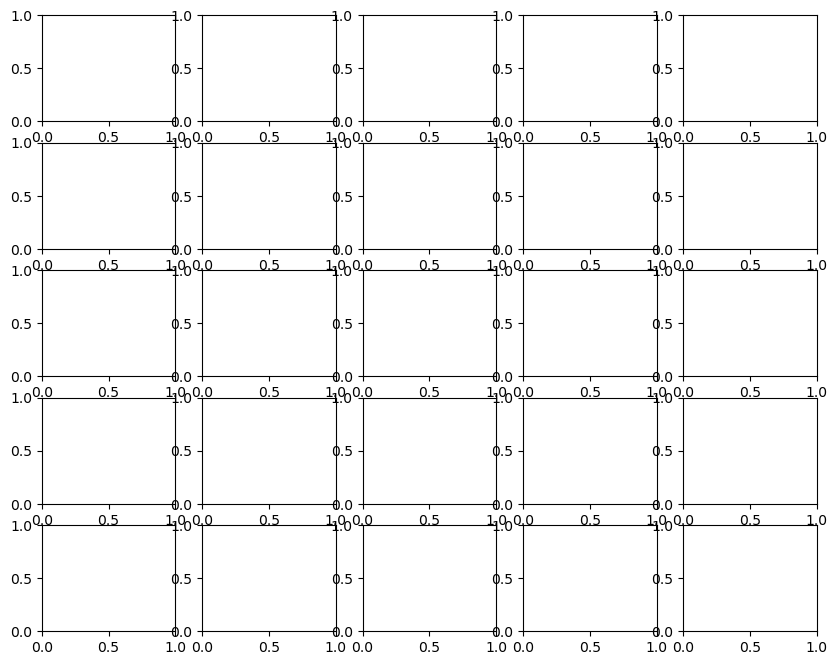

NameError: name 'axes' is not defined

In [255]:
# Beyond this ill most likely delete. it is from when I didn't believe id get all the data in time

In [311]:
# test = pd.read_csv("backupData/pandas200.csv", low_memory=False)
test = pd.read_csv("backupData/pandas200.csv")
test.head()


pd.DataFrame(test.groupby(["latitude", "longitude"], sort=False))

# for row, index in 

/tmp/ipykernel_132/2438347540.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv("backupData/pandas200.csv")


,0,1
0,"(50.861156, 4.3315506)",location_id latitude longitude ...
1,"(51.21265, 4.370504)",location_id latitude longitude ...
2,"(51.21265, 3.23741)",location_id latitude longitude ...
3,"(50.439365, 4.4444447)",location_id latitude longitude ...
4,"(51.072056, 3.7096772)",location_id latitude longitude ...
...,...,...
187,"(45.377853, 11.830986)",location_id latitude longitude ...
188,"(38.13708, 13.342318)",location_id latitude longitude ...
189,"(44.674866, 10.261942)",location_id latitude longitude ...
190,"(43.128292, 12.339791)",location_id latitude longitude ...


In [290]:
test["time"] = pd.to_datetime(test["time"], errors='coerce')

In [298]:
target = "9-1"
start = datetime.strptime(target, "%m-%d")
target = "12-1"
end = datetime.strptime(target, "%m-%d")

fall = test[(test["time"].dt.month >= start.month) & (test["time"].dt.month < end.month)]

target = "12-1"
start = datetime.strptime(target, "%m-%d")
target = "3-1"
end = datetime.strptime(target, "%m-%d")

winter = test[(test["time"].dt.month >= start.month) & (test["time"].dt.month < end.month)]

target = "3-1"
start = datetime.strptime(target, "%m-%d")
target = "6-1"
end = datetime.strptime(target, "%m-%d")

spring = test[(test["time"].dt.month >= start.month) & (test["time"].dt.month < end.month)]

target = "6-1"
start = datetime.strptime(target, "%m-%d")
target = "9-1"
end = datetime.strptime(target, "%m-%d")

summer = test[(test["time"].dt.month >= start.month) & (test["time"].dt.month < end.month)]


In [308]:
citiesLocWeather = pd.read_csv("citiesLoc.csv")
citiesLocWeather["Summer Ave."] = 0.0



avTemp = pd.DataFrame(summer.groupby(["latitude", "longitude"])["temperature_2m_mean (°C)"].mean()).reset_index()
avTemp.columns = ['latitude', 'longitude', 'summer_avg_temp']

merged_df = pd.merge(citiesLocWeather, avTemp, how='left', left_on=['Lat', 'Long'], right_on=['latitude', 'longitude'])
merged_df.head(60)

,Country,Province,City,Pop.,ABBR,Rent,Total COL,Sal,QOL,Prov. ABBR,Lat,Long,Summer Ave.,latitude,longitude,summer_avg_temp
0,Belgium,Brussels,Anderlecht,"125,883",BE,1033,1889,3040,76,NaN,50.839098,4.329653,0.0,NaN,NaN,NaN
1,Belgium,Flanders,Antwerp,"542,417",BE,909,1818,2918,91,NaN,51.221110,4.399708,0.0,NaN,NaN,NaN
2,Belgium,Flanders,Bruges,"119,748",BE,1005,1868,2486,82,NaN,51.208553,3.226772,0.0,NaN,NaN,NaN
3,Belgium,Brussels,Brussels,"195,546",BE,1133,2028,3458,91,NaN,50.846557,4.351697,0.0,NaN,NaN,NaN
4,Belgium,Wallonia,Charleroi,"203,950",BE,928,1718,2345,87,NaN,50.411623,4.444528,0.0,NaN,NaN,NaN
5,Belgium,Flanders,Ghent,"269,191",BE,953,1811,2819,87,NaN,51.053829,3.725012,0.0,NaN,NaN,NaN
6,Belgium,Wallonia,Liège,"194,994",BE,812,1599,3134,74,NaN,50.645094,5.573611,0.0,NaN,NaN,NaN
7,Belgium,Flemish,Leuven,"103,868",BE,1100,1867,3283,91,NaN,50.879202,4.701168,0.0,NaN,NaN,NaN
8,Belgium,Wallonia,Namur,"114,007",BE,801,1588,2322,73,NaN,50.466528,4.866189,0.0,NaN,NaN,NaN
9,Belgium,Brussels,Schaerbeek,"129,853",BE,1022,1854,3204,77,NaN,50.867604,4.373712,0.0,NaN,NaN,NaN


In [320]:
citiesLocWeather['Lat_rounded'] = citiesLocWeather['Lat'].astype(int)
citiesLocWeather['Long_rounded'] = citiesLocWeather['Long'].astype(int)
avTemp['lat_rounded'] = avTemp['latitude'].astype(int)
avTemp['long_rounded'] = avTemp['longitude'].astype(int)

# Merge on rounded coordinates
merged_df = pd.merge(citiesLocWeather, avTemp, 
                     left_on=['Lat_rounded', 'Long_rounded'], 
                     right_on=['lat_rounded', 'long_rounded'], 
                     how='left')

# merged_df.iloc[280:350]


186

In [325]:
cityData = pd.read_csv("cities.csv")

filtered_df = cityData.loc[cityData['Country'] == "Albania"]

filtered_df

,Country,Province,City,Pop.,ABBR,Rent,Total COL,Sal,QOL,Prov. ABBR
34,Albania,Tirana,Tirana,"418,495",AL,630,1294,803,72,NaN
35,Albania,Durrës,Durrës,"113,249",AL,418,945,824,57,NaN
